In [27]:
from torch.utils.data import Dataset

from datasets import load_dataset

ds = load_dataset("lmms-lab/RefCOCO")

In [31]:
sample = ds['val'][0]

In [32]:
sample

{'question_id': '1537681',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x428>,
 'question': 'Please carefully observe the area circled in the image and come up with a caption for the area.',
 'answer': ['bowl behind the others can only see part',
  'Dish in top right corner',
  'White dish in the top right corner.',
  'white pot upper right corner'],
 'segmentation': [468.29998779296875,
  2.8299999237060547,
  471.17999267578125,
  46.0099983215332,
  473.1000061035156,
  83.44000244140625,
  521.0900268554688,
  107.43000030517578,
  580.5800170898438,
  117.02999877929688,
  640.0,
  106.47000122070312,
  640.0,
  104.55000305175781,
  640.0,
  0.9100000262260437],
 'bbox': [468.29998779296875,
  0.9100000262260437,
  171.6999969482422,
  116.12000274658203],
 'iscrowd': 0,
 'file_name': 'COCO_train2014_000000580957_4.jpg'}

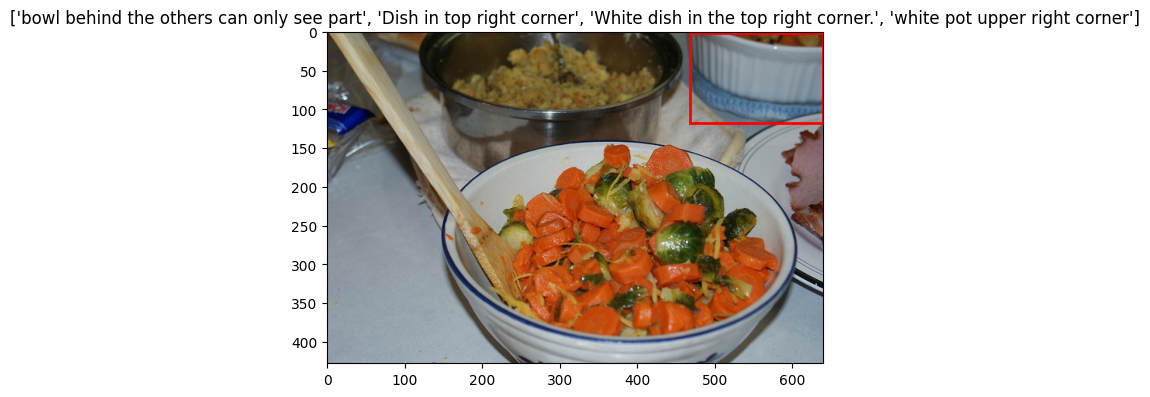

In [33]:
import matplotlib.pyplot as plt


bbox = sample["bbox"]
image = sample["image"]
text = sample["answer"]
# plot the image with the bbox
plt.imshow(image)
plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='red', linewidth=2))
plt.title(text)
plt.show()

In [34]:
image.height, image.width

(428, 640)

In [35]:

class ObjectDetectionDataset(Dataset):
    def __init__(self, split, ds_name):
        self.dataset = load_dataset(ds_name)[split]

        # shuffle the dataset
        self.dataset.shuffle(seed=11)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # from the dataset  get image, convert to xmin, ymin, xmax, ymax
        sample = self.dataset[idx]
        image = sample["image"]
        # Convert the image to RGB if it's not already
        if image.mode != "RGB":
            image = image.convert("RGB")
        label = sample["answer"][0]
        box = sample["bbox"] # coco bbox is x, y, w, h      
        x, y, w, h = box

        # normalize to 0-1
        boxes = {
            "x_min": (x ) / image.width,
            "y_min": (y) / image.height,
            "x_max": (x + w ) / image.width,
            "y_max": (y + h) / image.height,
        }
        # Extract the image, query, and bounding boxes
        return image, label, [boxes]



def load_object_detection_dataset(split):
    if split == "train":
        return ObjectDetectionDataset("val", "lmms-lab/RefCOCO")
    elif split == "val":
        return ObjectDetectionDataset("test", "lmms-lab/RefCOCO")
    else:
        raise ValueError(f"Invalid split: {split}")


ds = load_object_detection_dataset("train")


In [36]:
sample = ds[121]

In [37]:
sample

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x640>,
 'lady in purpl asian',
 [{'x_min': 0.6322645290581163,
   'y_min': 0.2924999952316284,
   'x_max': 0.9698797619653369,
   'y_max': 0.8359062433242798}])

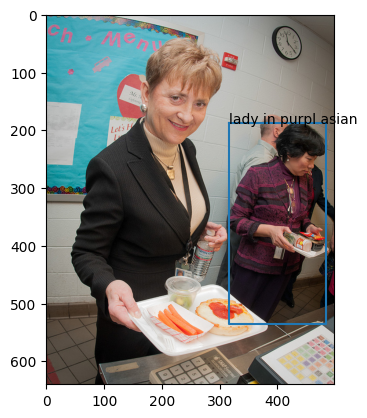

In [38]:
from visualization_utils import plot_sample

plot_sample(sample)